 # import libraries 

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as  stats
import matplotlib.pyplot as plt

# Load Dataset

In [20]:
df=pd.read_csv('/kaggle/input/review/diabetes.csv')

# Analyse Data Frame Deeply 

In [21]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
#print Head 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# Display summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.duplicated().sum()

0

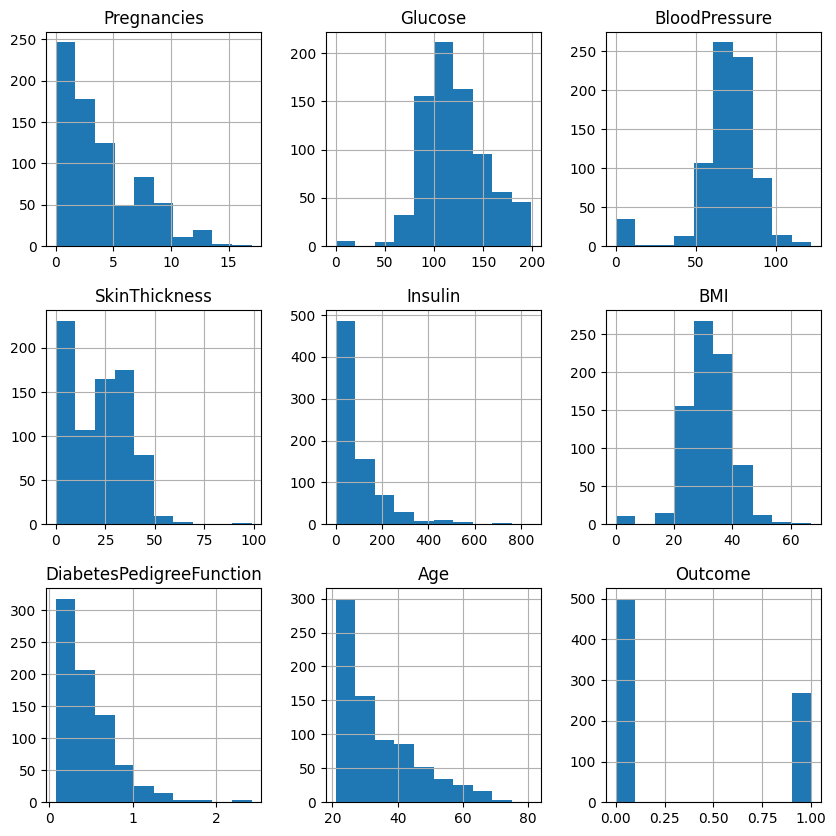

In [26]:
# Visualize distributions of numeric variables
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()

# Data Preprocessing 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Feature scaling
scaler = StandardScaler()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,0,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# Features Engineering 

In [29]:
# Feature selection using correlation matrix
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

# EDA (exploratory Data Analysis)

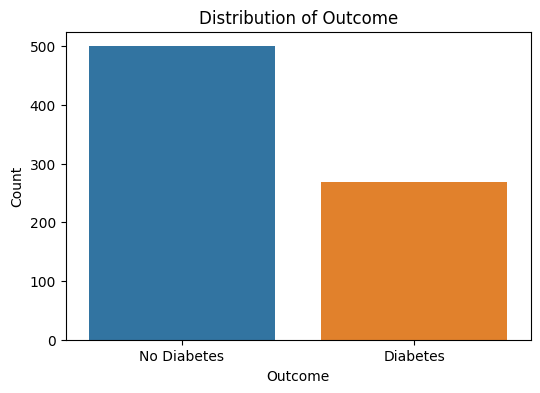

In [30]:
#Visualization 1: Distribution of Outcome (Diabetes vs. No Diabetes)
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

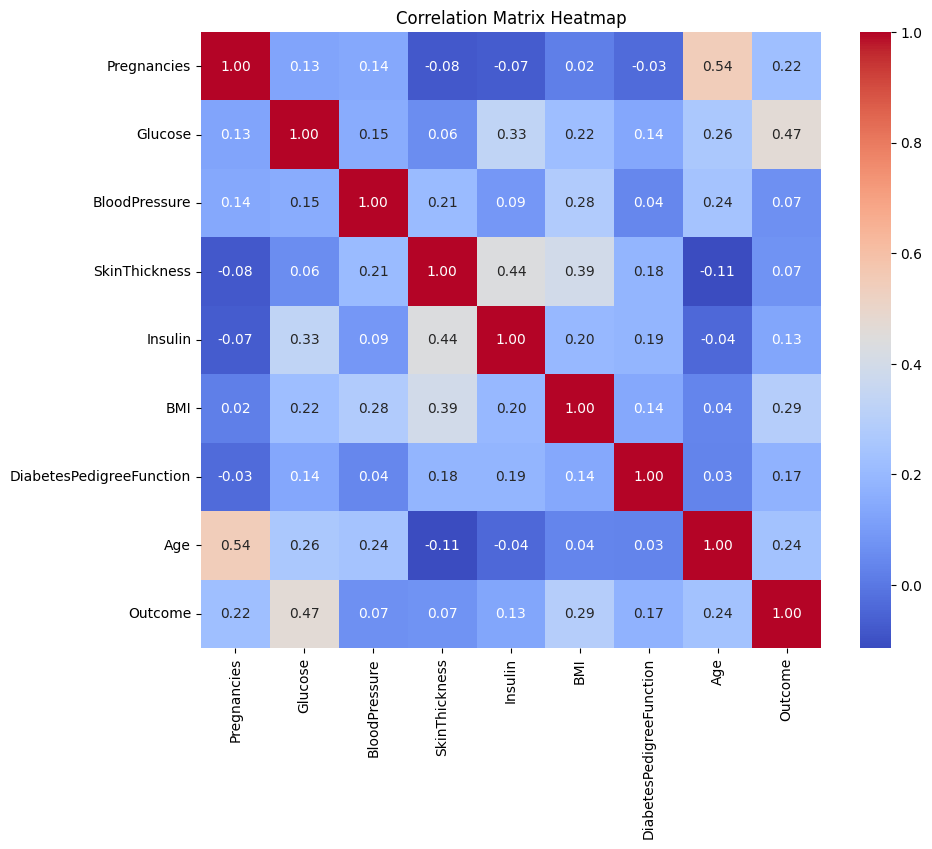

In [31]:
#Visualization 2: Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Selection 

In [32]:
# Importing necessary models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Splitting the data into train and test sets

In [33]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier

In [34]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)


In [35]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [38]:
# If you want to interpret the model further, you can analyze feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
Pregnancies                 0.076551
Glucose                     0.258864
BloodPressure               0.088134
SkinThickness               0.065646
Insulin                     0.076122
BMI                         0.169984
DiabetesPedigreeFunction    0.123768
Age                         0.140931
dtype: float64


# Decision Tree Classifier

In [39]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred_dt = decision_tree_model.predict(X_test)
# Calculate accuracy for decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.7467532467532467


# Logistic Regression model

In [41]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [42]:
# Make predictions using logistic regression model
y_pred_lr = logistic_regression_model.predict(X_test)

# Calculate accuracy for logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.7532467532467533


## Checking accuracy with Ghraphs

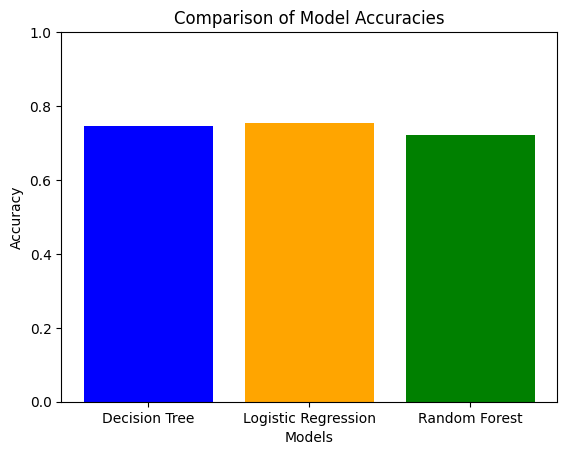

In [43]:
# Create a bar plot to compare accuracies
models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_dt, accuracy_lr, accuracy]
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.0, 1.0)  # Set y-axis limit to 0-1
plt.show()

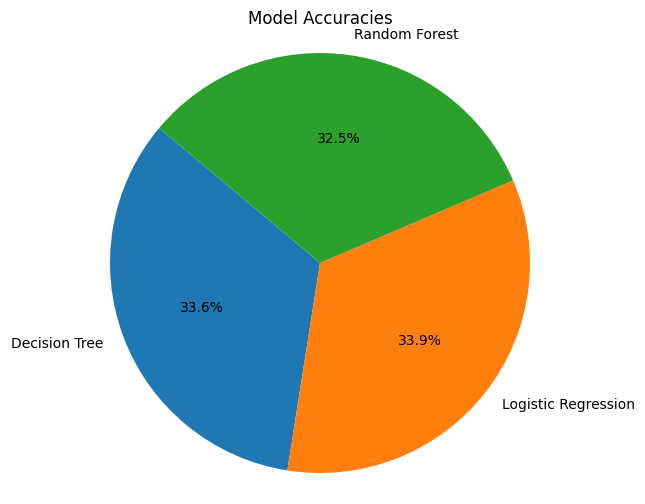

In [44]:
# Calculate percentages
total_accuracy = sum([accuracy_dt, accuracy_lr, accuracy])
percentages = [accuracy_dt / total_accuracy, accuracy_lr / total_accuracy, accuracy / total_accuracy]

# Labels for the pie chart
labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model Accuracies')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


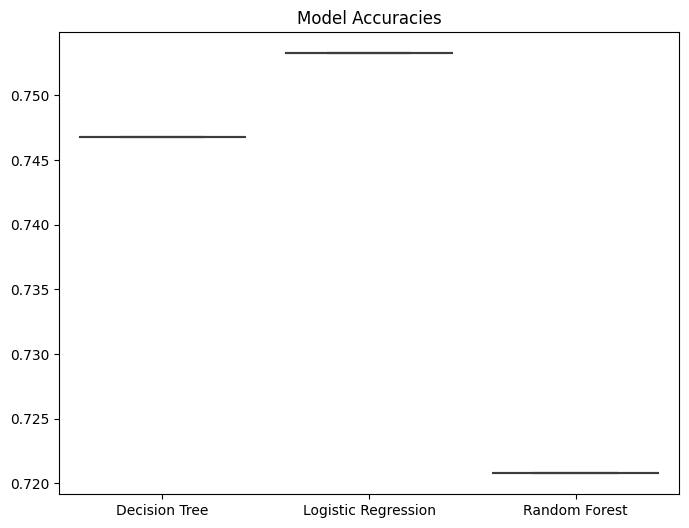

In [45]:
import seaborn as sns

# Data preparation
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_dt, accuracy_lr, accuracy]

data = {'Model': model_names, 'Accuracy': accuracies}

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Accuracy', data=data)
plt.title('Model Accuracies')
plt.show()

---